In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [5]:
model.fit(xs, ys, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 241ms/step - loss: 10.1587
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 8.2042
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 6.6621
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 5.4446
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 4.4825
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 3.7216
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 3.1189
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 2.6408
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 2.2608
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9581


In [6]:
model.predict([10])

array([[12.464411]], dtype=float32)

In [7]:
mnist_fashion = tf.keras.datasets.fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = mnist_fashion.load_data()

Label: 9
Image Pixel Array: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3  

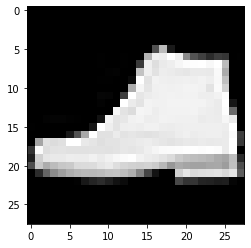

In [9]:
index = 42
print(f'Label: {y_train[index]}')

np.set_printoptions(linewidth=300)

print(f'Image Pixel Array: \n{X_train[index]}')

plt.imshow(X_train[index], cmap='gray')


In [10]:
# Normalize the pixel values

X_train = X_train/255.0
X_test = X_test/255.0


In [11]:
# Build the Classification Model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [12]:
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'inputs to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'outputs of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

inputs to softmax function: [[1. 3. 4. 2.]]
outputs of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [13]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7399 - accuracy: 0.7577
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5126 - accuracy: 0.8253
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4671 - accuracy: 0.8397
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4425 - accuracy: 0.8478
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4235 - accuracy: 0.8537


In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4430 - accuracy: 0.8430


[0.44296514987945557, 0.8429999947547913]

In [15]:
classification= model.predict(X_test)
print(np.argmax(classification[0]))

9


In [21]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print("\nReached 90% accuracy so stopping training")

            self.model.stop_training = True

In [22]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

callbacks = myCallback()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks= callbacks)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1830 - accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0734 - accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0470 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0269 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0204 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0170 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0147 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0134 - accuracy: 0.9957

Reached 90% accuracy so stopping training
313/313 [=======================

# Improving Computer Vision Accuracy using Convolutions Shallow Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist_fashion.load_data()
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc}')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

# Visualizing the Convolutions and Pooling

In [26]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


# 16 Units

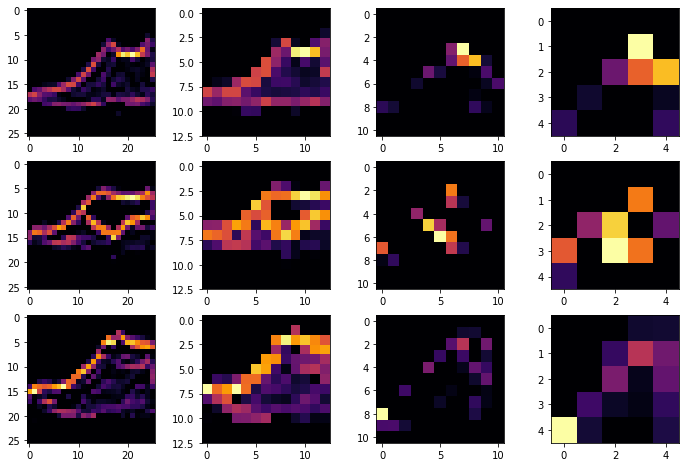

In [14]:
fig, axarr = plt.subplots(3,4, figsize = (12,8))

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap='inferno')

    f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:, CONVOLUTION_NUMBER], cmap='inferno')

    f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:, CONVOLUTION_NUMBER], cmap='inferno')

# 32 Units

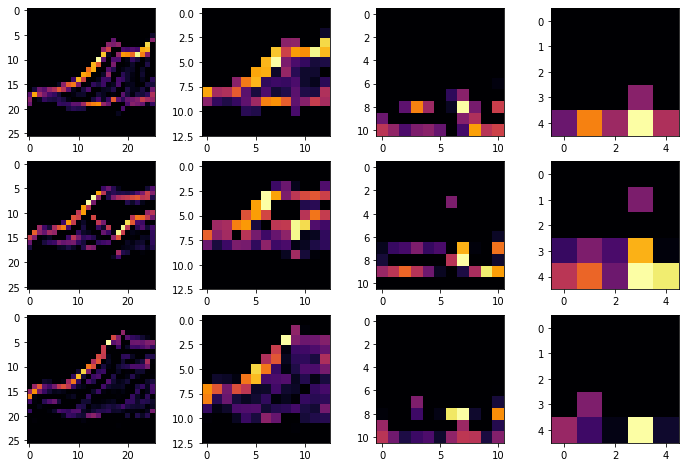

In [8]:
fig, axarr = plt.subplots(3,4, figsize=(12,8))

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 30

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap='inferno')
    
    f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

# 64 Units

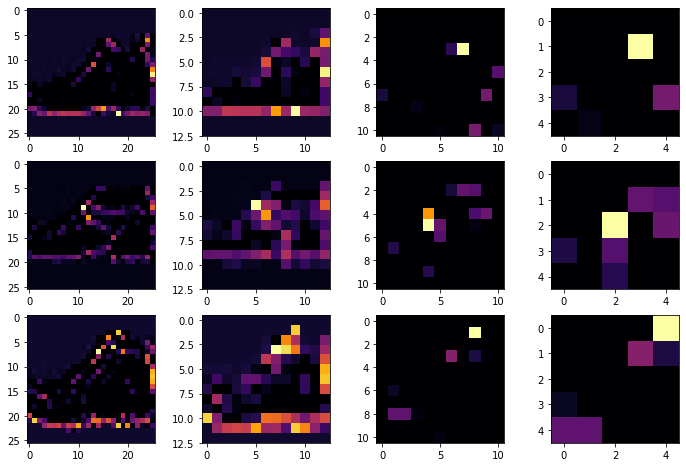

In [27]:
fig, axarr = plt.subplots(3,4, figsize=(12,8))

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 31

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap='inferno')
    
    f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

# Exploring Convolutions

In [9]:
from scipy import misc
#load the ascent image
ascent_image = misc.ascent()

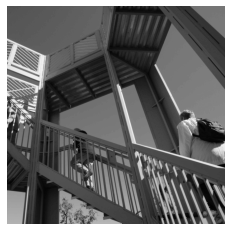

In [16]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [20]:
import numpy as np

image_transformed = np.copy(ascent_image)

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [27]:
# filter = [[0,1,0],[1,-4,1],[0,1,0]]
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

In [28]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

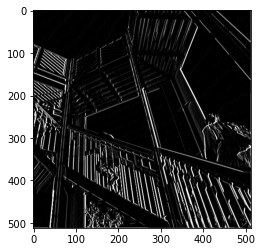

In [29]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

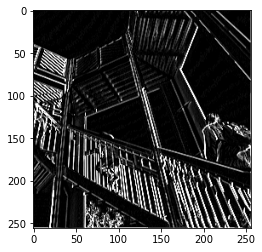

In [30]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

# Training with ImageDataGenerator

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

shutil.move('horse-or-human.zip', '../../Datasets')

--2022-04-02 10:01:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:400f:804::2010, 2607:f8b0:400f:803::2010, 2607:f8b0:400f:802::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:400f:804::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  10.7MB/s    in 14s     

2022-04-02 10:01:38 (10.4 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



#  Training with ImageDataGenerator

In [1]:
import os
import cv2
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
local_zip = '../../Datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('../../Datasets/horse-or-human')
zip_ref.close()

In [2]:
train_horse_dir = os.path.join('../../Datasets/horse-or-human/horses')
train_human_dir = os.path.join('../../Datasets/horse-or-human/humans')

In [3]:
train_horse_names = os.listdir(train_horse_dir)
print("Total train horse images: ", len(train_horse_names))
train_human_names = os.listdir(train_human_dir)
print("Total train human images: ", len(train_human_names))

Total train horse images:  500
Total train human images:  527


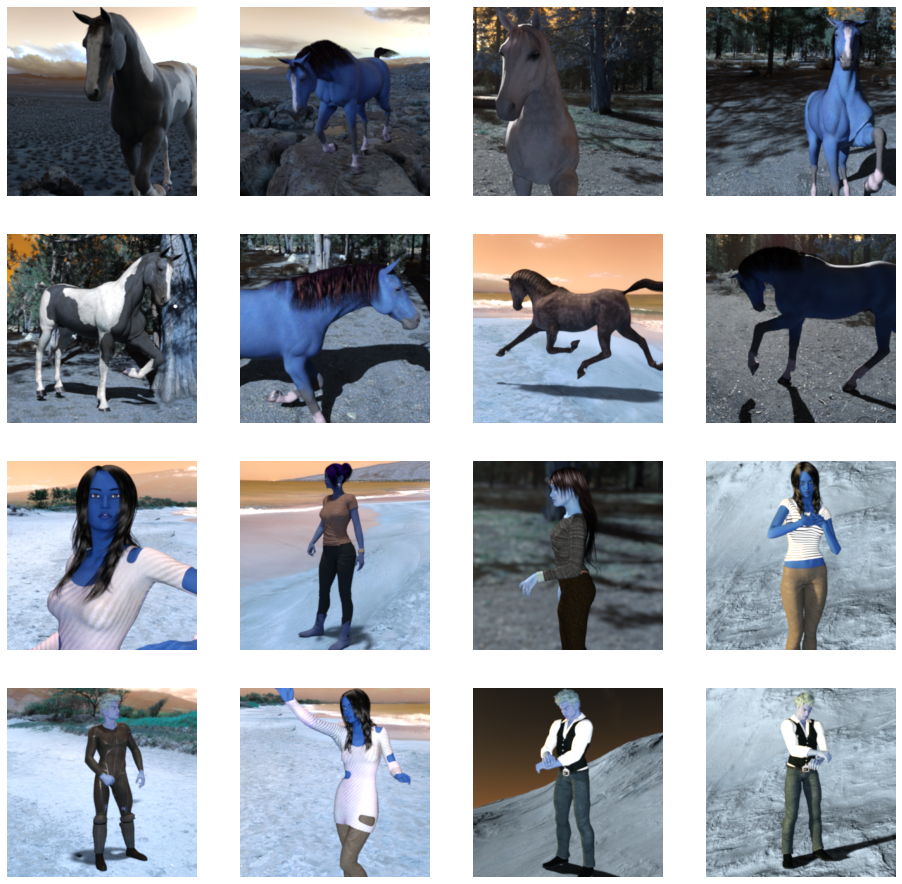

In [4]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(4*nrows, 4*ncols)
random_idx = np.random.randint(500, size=8)
random_horse = [os.path.join(train_horse_dir, train_horse_names[idx]) for idx in random_idx]
random_human = [os.path.join(train_human_dir, train_human_names[idx]) for idx in random_idx]

for i, name in enumerate(random_horse+random_human):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    img = cv2.imread(name)
    plt.imshow(img)

## Building a Small Model from Scratch

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory(
    '../../Datasets/horse-or-human',
    target_size =(300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 25s 3s/step - loss: 0.9948 - accuracy: 0.5517
Epoch 2/15
8/8 [==============================] - 25s 4s/step - loss: 0.9287 - accuracy: 0.5228
Epoch 3/15
8/8 [==============================] - 25s 4s/step - loss: 0.6668 - accuracy: 0.6641
Epoch 4/15
8/8 [==============================] - 26s 3s/step - loss: 0.5001 - accuracy: 0.8154
Epoch 5/15
8/8 [==============================] - 25s 3s/step - loss: 0.3833 - accuracy: 0.8343
Epoch 6/15
8/8 [==============================] - 25s 3s/step - loss: 0.3724 - accuracy: 0.8498
Epoch 7/15
8/8 [==============================] - 24s 3s/step - loss: 0.2441 - accuracy: 0.9077
Epoch 8/15
8/8 [==============================] - 24s 3s/step - loss: 0.2313 - accuracy: 0.9088
Epoch 9/15
8/8 [==============================] - 26s 3s/step - loss: 0.2288 - accuracy: 0.9199
Epoch 10/15
8/8 [==============================] - 24s 3s/step - loss: 0.2614 - accuracy: 0.9244
Epoch 11/15
8/8 [======================